$$\ddot{x} + 2 \eta \dot{x} + q(x)  = f \sin{\Omega t}$$

$$q(x) = \omega^2 x +  \gamma x^3, \gamma > 0$$

$$\dot{y} + 2 \eta y +  \omega^2 x +  \gamma x^3  = f \sin{\Omega t}$$
$$y = \dot{x}$$


In [2]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [3]:
@nb.njit
def right_part(t, arg, eta, gamma, omega, OMEGA, f):
    
    rp = np.array([f*np.sin(OMEGA*t) - 2*eta*arg[0] - arg[1]*omega**2 - gamma*arg[1]**3,
                   arg[0]], dtype=np.float64)
    
    return rp

In [4]:
@nb.njit
def solver(N, dt, y0, x0, eta, gamma, omega, OMEGA, f):
    
    left_part = np.zeros((2,N), dtype=np.float64)
    left_part[0,0] = y0
    left_part[1,0] = x0
    
    time = np.linspace(0,dt*N,N)
    
    for i in range(N-1):
        
        k1 = np.zeros((2), dtype=np.float64)
        k2 = np.zeros((2), dtype=np.float64)
        k3 = np.zeros((2), dtype=np.float64)
        k4 = np.zeros((2), dtype=np.float64)
        
        k1 = right_part(time[i], left_part[:,i], eta, gamma, omega, OMEGA, f)
        k2 = right_part(time[i]+dt/2, left_part[:,i]+k1*dt/2, eta, gamma, omega, OMEGA, f)
        k3 = right_part(time[i]+dt/2, left_part[:,i]+k2*dt/2, eta, gamma, omega, OMEGA, f)
        k4 = right_part(time[i]+dt, left_part[:,i]+k3*dt, eta, gamma, omega, OMEGA, f)
        
        left_part[:,i+1] = left_part[:,i] + dt*(k1[:] + 2*k2[:] + 2*k3[:] + k4[:])/6
    
    return left_part

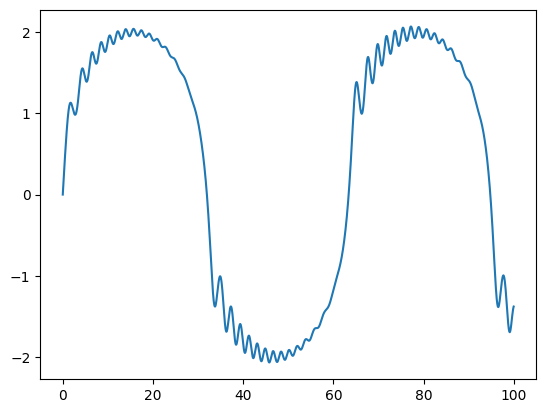

In [5]:
eta = 0.1
omega = 1
OMEG = 0.1
gamma = 1
f = 10
x0 = 0
y0 = 1
dt = 0.01
N = 10000

t = np.arange(0, dt * N, dt)

solv = solver(N, dt, y0, x0, eta, gamma, omega, OMEG, f)

plt.plot(t, solv[1,:])
plt.show()

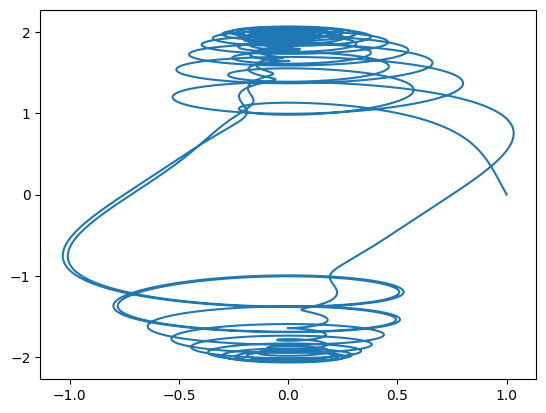

In [6]:
plt.plot(solv[0,:], solv[1,:])
plt.show()

In [7]:
signal = solv[1,2000:]
A = (np.max(signal) - np.min(signal))/2
A

np.float64(2.0704302394076493)

In [61]:
@nb.njit(parallel=True)
def ACHH():
    eta = 0.75
    omega = 3
    
    gamma = 10
    f = 7
    x0 = 0
    y0 = 1
    dt = 0.1
    N = 15000
    t = np.arange(0, dt * N, dt)
    B_point = 10000
    d_OMEGA = 0.001
    point_relax = int(N*0.2)
    A = np.zeros((B_point), dtype=np.float64)
    # OMEG = np.arange(4, d_OMEGA * B_point, d_OMEGA)
    OMEG = np.linspace(0.1,8,B_point)
    len_c = len(OMEG)
    for i in nb.prange(len_c):
        solv = solver(N, dt, y0, x0, eta, gamma, omega, OMEG[i], f)
        signal = solv[1,point_relax:]
        A[i] = (np.max(signal) - np.min(signal))/2
        
    return A, OMEG
    

In [62]:
AAA, OOO = ACHH()

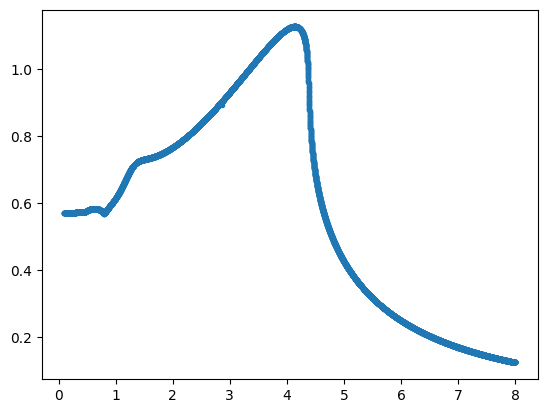

In [63]:
plt.plot(OOO, AAA, ".")
plt.show()


Отображение векторного поля образуемого системой 
$$\begin{cases}
 \dot{y} = -2 \eta y -  \omega^2 x -  \gamma x^3  + f \sin{\Omega t} \\
 \dot{x} = y
\end{cases}$$


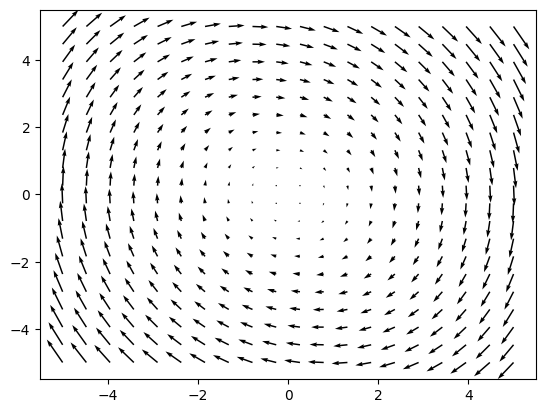

In [ ]:
# отображение векторного поля образуемого уравнением
# вектора это касательные в каждой траектории так и задаеся векторное поле

x,y = np.meshgrid(np.linspace(-5,5,20),np.linspace(-5,5,20))

eta = 0.1
omega = 1
OMEG = 2
gamma = 0.01
f = 11

y_dot = -2*eta*y - omega**2*x - gamma*x**3 #+ f*np.sin(OMEG*2)  #-np.sin(x)
x_dot = y

plt.quiver(x,y,x_dot,y_dot)
plt.show()

$$\ddot{x} + 2 \eta \dot{x} + \omega^2 x +  \gamma x^3  = f \sin{\Omega t}$$

$$ x(t) = A(t)\sin{\Omega t}$$

$$ \dot{x(t)} = \dot{A(t)}\sin{\Omega t}+A(t)\Omega\cos{\Omega t}$$

$$ \ddot{x(t)} = \ddot{A(t)}\sin{\Omega t}+\dot{A(t)}\Omega\cos{\Omega t}+\dot{A(t)}\Omega\cos{\Omega t}-A(t)\Omega^2\sin{\Omega t}$$



$$\ddot{A(t)}\sin{\Omega t}+\dot{A(t)}\Omega\cos{\Omega t}+\dot{A(t)}\Omega\cos{\Omega t}-A(t)\Omega^2\sin{\Omega t} + 2 \eta\dot{A(t)}\sin{\Omega t}+2 \eta A(t)\Omega\cos{\Omega t} + \omega^2 A(t)\sin{\Omega t} +  \gamma A(t)^3\sin{\Omega t}^3  = f \sin{\Omega t}$$

$$\ddot{A(t)}+2\dot{A(t)}\Omega\ctg{\Omega t}-A(t)\Omega^2 + 2 \eta\dot{A(t)}+2 \eta A(t)\Omega\ctg{\Omega t} + \omega^2 A(t) +  \gamma A(t)^3\sin{\Omega t}^2  = f$$

стационарные точки 
$$\dot{q} = F(q)$$
$$F(q) = 0$$
получаем $q_{st}$ стационарную 
устойчивость
неустойчива:
$$\left.\frac{\partial F(q)}{\partial q} \right|_{q_{st}} > 0$$
устойчива:
$$\left.\frac{\partial F(q)}{\partial q}\right|_{q_{st}} < 0$$